

---


# Real Estate Analysis


---



### Housing in Toronto

Plot the house price trends along with specifications.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Toronto-Real-Estate-Listings-2021-05-28.csv")
df.shape

(4822, 5)

In [2]:
df.head()

,Address,Price,Beds,Baths,Space
0,"26 Laidlaw St, Toronto, Ontario","$799,000 CAD",2 BedsBds,2 BathsBa,"1,000 SqftSqft"
1,Bayview at the Village - From Mid $400s - BAYV...,"$695,000 CAD",NaN,NaN,NaN
2,"5 Soudan Ave, Toronto, Ontario","$799,900 CAD",2 BedsBds,2 BathsBa,700 SqftSqft
3,"500 Sherbourne St, Toronto, Ontario","$799,900 CAD",1 BedBd,2 BathsBa,"1,000 SqftSqft"
4,"651 Willard Avenue, Toronto, Ontario M6S 3S1","$999,000 CAD",2 BedsBds,2 BathsBa,NaN


In [3]:
df.tail()

,Address,Price,Beds,Baths,Space
4817,"85 East Liberty St E, Toronto, Ontario M6K3R4","$599,900 CAD",2 BedsBds,2 BathsBa,NaN
4818,"Burke Condos - Toronto Preconstruction Condos,...","$689,000 CAD",1 BedBd,1 BathBa,500 SqftSqft
4819,"McLevin Ave and Tapscott Rd, Toronto, Toronto,...","$620,000 CAD",2 BedsBds,2 BathsBa,NaN
4820,"181 Sheppard Ave East, Toronto, Ontario","$908,900 CAD",2 BedsBds,2 BathsBa,NaN
4821,"24 Buckingham St, Etobicoke, Toronto, Ontario ...","$450,000 CAD",1 BedBd,1 BathBa,NaN


In [4]:
df = df.dropna(subset = ["Beds"])
print(df.shape)
df = df.dropna(subset = ["Baths"])
print(df.shape)

(4546, 5)
(4543, 5)


In [5]:
price = [int((p[1:-4]).replace(',', '')) for p in df['Price']]
beds = [int(bd.split()[0]) for bd in df['Beds']]
baths = [int(bt.split()[0]) for bt in df['Baths']]

Text(0, 0.5, 'price')

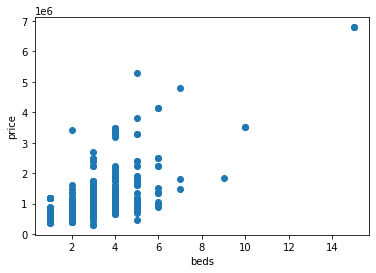

In [6]:
plt.scatter(beds, price)
plt.xlabel('beds')
plt.ylabel('price')

Text(0, 0.5, 'price')

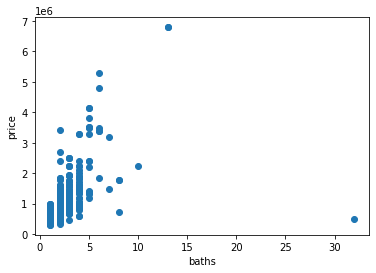

In [7]:
plt.scatter(baths, price)
plt.xlabel('baths')
plt.ylabel('price')

In [8]:
df = df.dropna(subset = ["Space"])
print(df.shape)
price = [int((p[1:-4]).replace(',', '')) for p in df['Price']]
beds = [int(bd.split()[0]) for bd in df['Beds']]
baths = [int(bt.split()[0]) for bt in df['Baths']]
space = [int(s.split()[0].replace(',', '')) for s in df['Space']]

(2161, 5)


Text(0, 0.5, 'price')

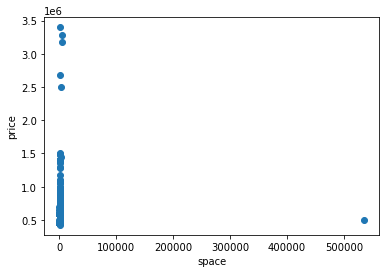

In [9]:
plt.scatter(space, price)
plt.xlabel('space')
plt.ylabel('price')

In [10]:
df2 = df.copy()
df2['Price'], df2['Beds'], df2['Baths'], df2['Space'] = price, beds, baths, space

In [11]:
df2.head()

,Address,Price,Beds,Baths,Space
0,"26 Laidlaw St, Toronto, Ontario",799000,2,2,1000
2,"5 Soudan Ave, Toronto, Ontario",799900,2,2,700
3,"500 Sherbourne St, Toronto, Ontario",799900,1,2,1000
7,"53 Mcintosh St, Toronto, Ontario",1399000,4,4,2000
8,"8 Mercer St, Toronto, Ontario",619000,1,1,500


In [12]:
# df2[(df2['Space'] < 1250) & (df2['Space'] > 1000) & (df2['Price'] >= 1000000)]
df2[(df2['Space'] > 500000) & (df2['Price'] >= 200000)]

,Address,Price,Beds,Baths,Space
716,"4694 Kingston Road PERCH Condos, Toronto, Onta...",499900,1,1,535000


In [13]:
df2.loc[135]['Address']

'M2M Townhomes. Yonge and Finch. M2M Spaces, Toronto, Ontario M2M 3T9'

In [14]:
df2 = df2.drop(index=716)
df2.shape

(2160, 5)

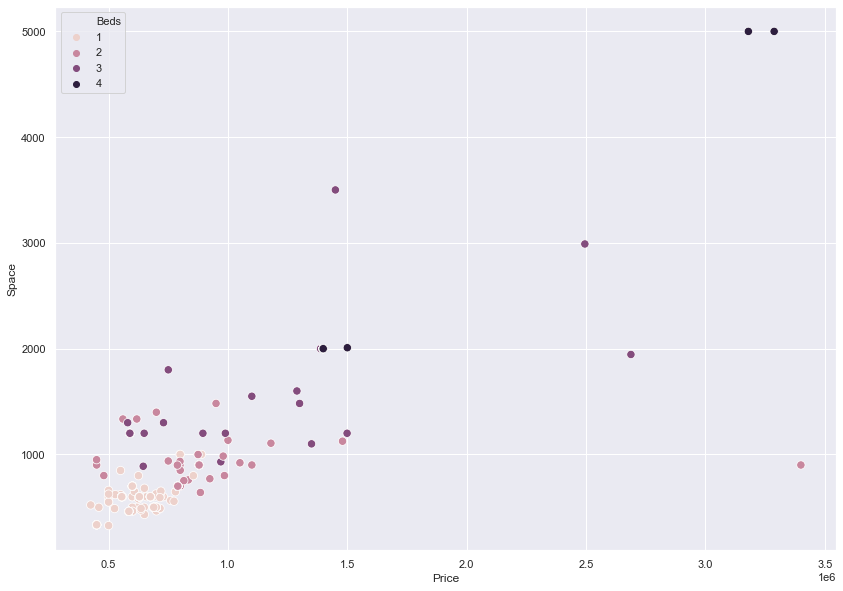

In [15]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.scatterplot(data=df2, x="Price", y="Space", hue="Beds", s=70)

In [16]:
df2[(df2['Space'] > 500) & (df2['Price'] >= 2000000)]

,Address,Price,Beds,Baths,Space
507,"143 Joicey Boulevard, Toronto, Ontario M5M 2T8",2495000,3,3,2990
526,"300 Hendon Avenue, Toronto, Ontario M2M 1B2",2688000,3,2,1945
530,"388 Yonge Street, Toronto, Ontario M5B 1L2",3399999,2,2,900
558,"252 Newton Dr, Toronto, Ontario M2M2P4",3180000,4,7,5000
684,"107 Otonabee Ave, Toronto, Ontario",3288000,4,5,5000


### Housing in Markham

In [17]:
markham_houses = pd.read_csv("Markham-Real-Estate-Listings-2021-05-29.csv")
markham_condos = pd.read_csv("Markham-Condos-For-Sale-2021-05-29.csv")

markham_houses = markham_houses.dropna(subset = ["Beds"])
# print(markham_houses.shape)
markham_houses = markham_houses.dropna(subset = ["Baths"])
# print(markham_houses.shape)
markham_houses = markham_houses.dropna(subset = ["Space"])
# print(markham_houses.shape)
markham_houses = markham_houses.dropna(subset = ["Price"])
# print(markham_houses.shape)

markham_condos = markham_condos.dropna(subset = ["Beds"])
# print(markham_condos.shape)
markham_condos = markham_condos.dropna(subset = ["Baths"])
# print(markham_condos.shape)
markham_condos = markham_condos.dropna(subset = ["Space"])
# print(markham_condos.shape)
markham_condos = markham_condos.dropna(subset = ["Price"])
# print(markham_condos.shape)

# markham house features
mkh_price = [int((p[1:-4]).replace(',', '')) for p in markham_houses['Price']]
mkh_beds = [int(bd.split()[0]) for bd in markham_houses['Beds']]
mkh_baths = [int(bt.split()[0]) for bt in markham_houses['Baths']]
mkh_space = [int(s.split()[0].replace(',', '')) for s in markham_houses['Space']]
markham_houses['Price'], markham_houses['Beds'], markham_houses['Baths'], markham_houses['Space'] = mkh_price, mkh_beds, mkh_baths, mkh_space

# markham condo features
mkc_price = [int((p[1:-4]).replace(',', '')) for p in markham_condos['Price']]
mkc_beds = [int(bd.split()[0]) for bd in markham_condos['Beds']]
mkc_baths = [int(bt.split()[0]) for bt in markham_condos['Baths']]
mkc_space = [int(s.split()[0].replace(',', '')) for s in markham_condos['Space']]
markham_condos['Price'], markham_condos['Beds'], markham_condos['Baths'], markham_condos['Space'] = mkc_price, mkc_beds, mkc_baths, mkc_space

# plt.scatter(mkh_price, mkh_space)
# plt.scatter(mkc_price, mkc_space)

In [18]:
markham_houses.tail()

,Address,Price,Beds,Baths,Space
1071,"10 Westmeath Lane, Markham, Ontario",738888,2,2,1000
1077,"42 Clark Ave, Markham, Ontario",1998000,3,4,2500
1094,"10 Welland Rd, Markham, Ontario",898888,3,4,1500
1095,"10 Westmeath Lane, Markham, Ontario",738888,2,2,1000
1101,"42 Clark Ave, Markham, Ontario",1998000,3,4,2500


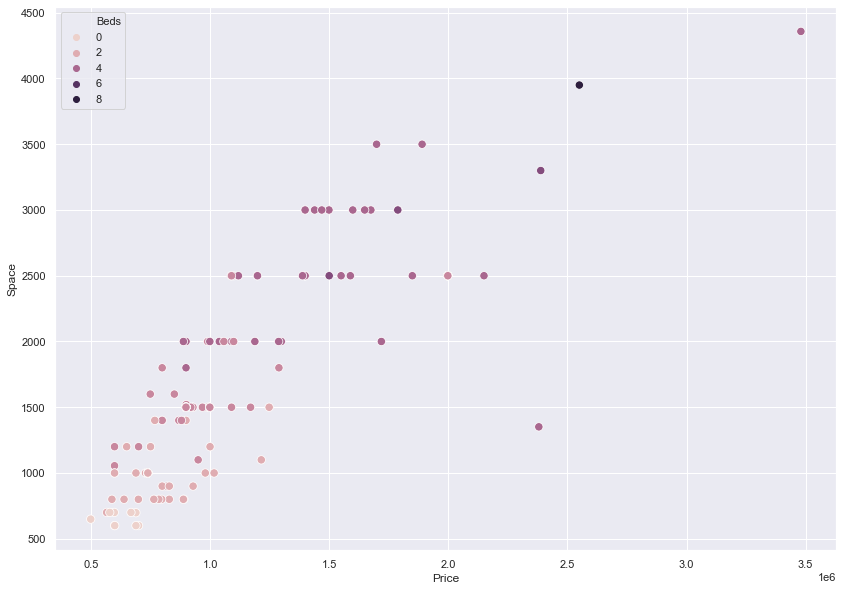

In [19]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.scatterplot(data=markham_houses, x="Price", y="Space", hue="Beds", s=70)

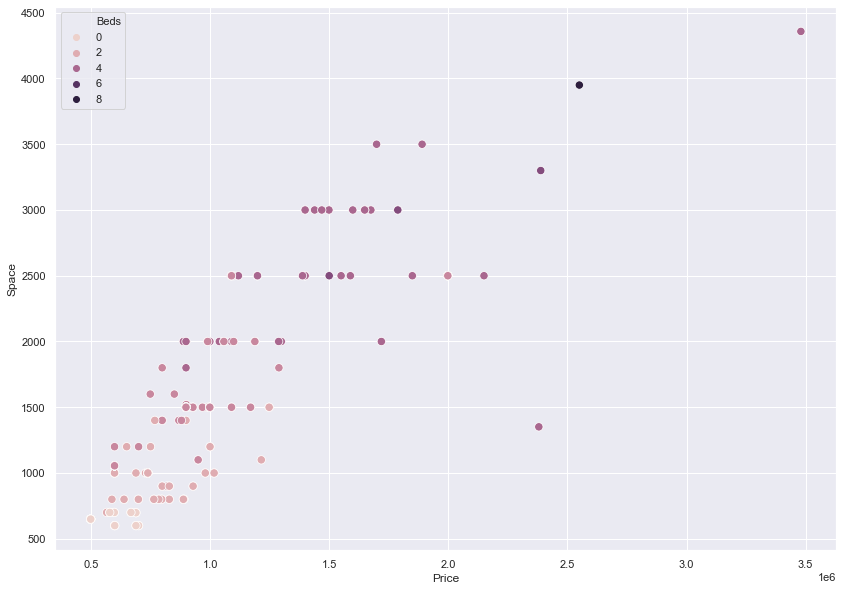

In [20]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.scatterplot(data=markham_condos, x="Price", y="Space", hue="Beds", s=70)

In [21]:
markham_houses.tail()

,Address,Price,Beds,Baths,Space
1071,"10 Westmeath Lane, Markham, Ontario",738888,2,2,1000
1077,"42 Clark Ave, Markham, Ontario",1998000,3,4,2500
1094,"10 Welland Rd, Markham, Ontario",898888,3,4,1500
1095,"10 Westmeath Lane, Markham, Ontario",738888,2,2,1000
1101,"42 Clark Ave, Markham, Ontario",1998000,3,4,2500


In [22]:
markham_condos.tail()

,Address,Price,Beds,Baths,Space
1809,"540 Bur Oak Ave, Markham, Ontario L6C0C4",499000,1,2,649
1818,"308-39 New Delhi Dr, Markham, ON L3S0E1, Markh...",599000,3,2,1055
1820,"10 Welland Rd, Markham, Ontario",898888,3,4,1500
1833,"540 Bur Oak Ave, Markham, Ontario L6C0C4",499000,1,2,649
1842,"308-39 New Delhi Dr, Markham, ON L3S0E1, Markh...",599000,3,2,1055


### Housing in Mississauga

In [23]:
mississauga_houses = pd.read_csv("Mississauga-Real-Estate-Listings-2021-05-29.csv")
mississauga_condos = pd.read_csv("Mississauga-Condos-For-Sale-2021-05-29.csv")

mississauga_houses = mississauga_houses.dropna(subset = ["Beds"])
# print(mississauga_houses.shape)
mississauga_houses = mississauga_houses.dropna(subset = ["Baths"])
# print(mississauga_houses.shape)
mississauga_houses = mississauga_houses.dropna(subset = ["Space"])
# print(mississauga_houses.shape)
mississauga_houses = mississauga_houses.dropna(subset = ["Price"])
# print(mississauga_houses.shape)

mississauga_condos = mississauga_condos.dropna(subset = ["Beds"])
# print(mississauga_condos.shape)
mississauga_condos = mississauga_condos.dropna(subset = ["Baths"])
# print(mississauga_condos.shape)
mississauga_condos = mississauga_condos.dropna(subset = ["Space"])
# print(mississauga_condos.shape)
mississauga_condos = mississauga_condos.dropna(subset = ["Price"])
# print(mississauga_condos.shape)

# mississauga house features
msh_price = [int((p[1:-4]).replace(',', '')) for p in mississauga_houses['Price']]
msh_beds = [int(bd.split()[0]) for bd in mississauga_houses['Beds']]
msh_baths = [int(bt.split()[0]) for bt in mississauga_houses['Baths']]
msh_space = [int(s.split()[0].replace(',', '')) for s in mississauga_houses['Space']]
mississauga_houses['Price'], mississauga_houses['Beds'], mississauga_houses['Baths'], mississauga_houses['Space'] = msh_price, msh_beds, msh_baths, msh_space

# mississauga condo features
msc_price = [int((p[1:-4]).replace(',', '')) for p in mississauga_condos['Price']]
msc_beds = [int(bd.split()[0]) for bd in mississauga_condos['Beds']]
msc_baths = [int(bt.split()[0]) for bt in mississauga_condos['Baths']]
msc_space = [int(s.split()[0].replace(',', '')) for s in mississauga_condos['Space']]
mississauga_condos['Price'], mississauga_condos['Beds'], mississauga_condos['Baths'], mississauga_condos['Space'] = msc_price, msc_beds, msc_baths, msc_space

# plt.scatter(msh_price, msh_space)
# plt.scatter(msc_price, msc_space)

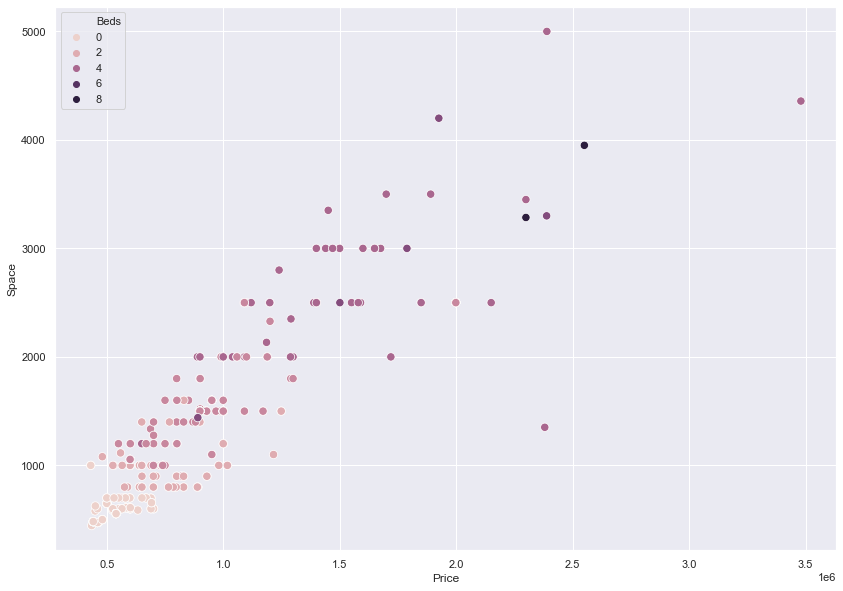

In [24]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.scatterplot(data=mississauga_houses, x="Price", y="Space", hue="Beds", s=70)

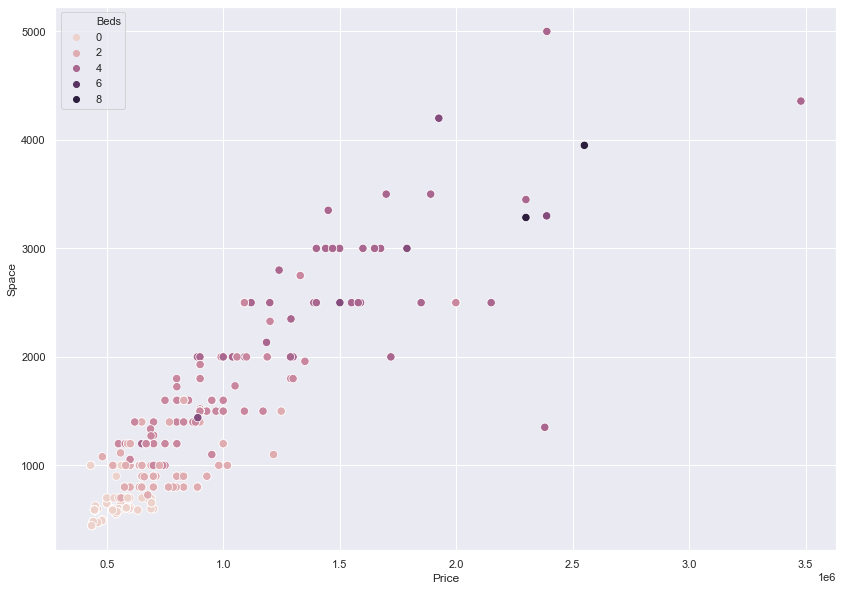

In [25]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.scatterplot(data=mississauga_condos, x="Price", y="Space", hue="Beds", s=70)

### House Listing Changes in Toronto

In [26]:
import pandas as pd

toronto_house_past = pd.read_csv('Toronto-Real-Estate-Listings-2021-05-28.csv')
print(toronto_house_past.shape)
# toronto_house_past = toronto_house_past.drop_duplicates(subset = ['Address'])
toronto_house_past = toronto_house_past.drop_duplicates() # drop rows that are identical
print(toronto_house_past.shape)
toronto_house_present = pd.read_csv('Toronto-Real-Estate-Listings-2021-05-31.csv')
print(toronto_house_present.shape)
# toronto_house_present = toronto_house_present.drop_duplicates(subset = ['Address'])
toronto_house_present = toronto_house_present.drop_duplicates() # drop rows that are identical
print(toronto_house_present.shape)

(4822, 5)
(607, 5)
(4679, 5)
(557, 5)


In [27]:
# drop empty rows from dataframe for specified columns
toronto_house_past = toronto_house_past.dropna(subset = ['Price'])
toronto_house_past = toronto_house_past.dropna(subset = ['Space'])
# assign integer values to variables
price = [int((p[1:-4]).replace(',', '')) for p in toronto_house_past['Price']]
space = [int(float(s.split()[0].replace(',', ''))) for s in toronto_house_past['Space']]
# assign specified dataframe columns integer values
toronto_house_past['Price'], toronto_house_past['Space'] = price, space

In [28]:
# drop empty rows from dataframe for specified columns
toronto_house_present = toronto_house_present.dropna(subset = ['Price'])
toronto_house_present = toronto_house_present.dropna(subset = ['Space'])
# assign integer values to variables
price = [int((p[1:-4]).replace(',', '')) for p in toronto_house_present['Price']]
space = [int(float(s.split()[0].replace(',', ''))) for s in toronto_house_present['Space']]
# assign specified dataframe columns integer values
toronto_house_present['Price'], toronto_house_present['Space'] = price, space

In [29]:
toronto_house_past.sort_values(["Price"], ascending=False).head()

,Address,Price,Beds,Baths,Space
303,"4 & 6 ORIOLE GDNS, Toronto, Ontario M4V1V7",6790000,NaN,NaN,7300
623,"652 Queen St W, Toronto, Ontario M6J1E5",4825000,NaN,NaN,4645
530,"388 Yonge Street, Toronto, Ontario M5B 1L2",3399999,2 BedsBds,2 BathsBa,900
684,"107 Otonabee Ave, Toronto, Ontario",3288000,4 BedsBds,5 BathsBa,5000
558,"252 Newton Dr, Toronto, Ontario M2M2P4",3180000,4 BedsBds,7 BathsBa,5000


In [30]:
toronto_house_past.sort_values(["Space"], ascending=False).head()

,Address,Price,Beds,Baths,Space
716,"4694 Kingston Road PERCH Condos, Toronto, Onta...",499900,1 BedBd,1 BathBa,535000
303,"4 & 6 ORIOLE GDNS, Toronto, Ontario M4V1V7",6790000,NaN,NaN,7300
558,"252 Newton Dr, Toronto, Ontario M2M2P4",3180000,4 BedsBds,7 BathsBa,5000
684,"107 Otonabee Ave, Toronto, Ontario",3288000,4 BedsBds,5 BathsBa,5000
623,"652 Queen St W, Toronto, Ontario M6J1E5",4825000,NaN,NaN,4645


In [31]:
toronto_house_present.sort_values(["Price"], ascending=False).head()

,Address,Price,Beds,Baths,Space
352,"652 Queen St W, Toronto, Ontario M6J1E5",4825000,NaN,NaN,4645
660,"176 Haddington Avenue, Toronto, Ontario M5M2P8",4488888,5 BedsBds,4 BathsBa,4169
415,"388 Yonge Street, Toronto, Ontario M5B 1L2",3399999,2 BedsBds,2 BathsBa,900
580,"107 Otonabee Ave, Toronto, Ontario",3288000,4 BedsBds,5 BathsBa,5000
234,"252 Newton Dr, Toronto, Ontario M2M2P4",3180000,4 BedsBds,7 BathsBa,5000


In [32]:
toronto_house_present.sort_values(["Space"], ascending=False).head()

,Address,Price,Beds,Baths,Space
234,"252 Newton Dr, Toronto, Ontario M2M2P4",3180000,4 BedsBds,7 BathsBa,5000
580,"107 Otonabee Ave, Toronto, Ontario",3288000,4 BedsBds,5 BathsBa,5000
352,"652 Queen St W, Toronto, Ontario M6J1E5",4825000,NaN,NaN,4645
660,"176 Haddington Avenue, Toronto, Ontario M5M2P8",4488888,5 BedsBds,4 BathsBa,4169
274,"23 ABBS ST, Toronto, Ontario M6K1M5",1999900,NaN,4 BathsBa,3321


In [33]:
# drop listing with abnormally large square footage from house listings
toronto_house_past = toronto_house_past.drop(index=716)
toronto_house_past.sort_values(["Space"], ascending=False).head()

,Address,Price,Beds,Baths,Space
303,"4 & 6 ORIOLE GDNS, Toronto, Ontario M4V1V7",6790000,NaN,NaN,7300
684,"107 Otonabee Ave, Toronto, Ontario",3288000,4 BedsBds,5 BathsBa,5000
558,"252 Newton Dr, Toronto, Ontario M2M2P4",3180000,4 BedsBds,7 BathsBa,5000
623,"652 Queen St W, Toronto, Ontario M6J1E5",4825000,NaN,NaN,4645
544,"15 Mallow Rd, Toronto, Ontario M3B 1G2",1450000,3 BedsBds,3 BathsBa,3501


In [34]:
# get house listings from past listings that are not in present listings
df_past = (toronto_house_past[~toronto_house_past.Address.isin(toronto_house_present.Address)])
print(df_past.shape)
# get house listings from present listings that are not in past listings
df_present = (toronto_house_present[~toronto_house_present.Address.isin(toronto_house_past.Address)])
print(df_present.shape)

(29, 5)
(38, 5)


In [35]:
# another method to determine houses present in past listings that are not in present listings
cond = toronto_house_past['Address'].isin(toronto_house_present['Address'])
toronto_house_past.drop(toronto_house_past[cond].index, inplace = True)
toronto_house_past.shape

(29, 5)

In [36]:
# a third method to determine houses present in past listings that are not in present listings
df = pd.merge(toronto_house_past, toronto_house_present, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df.shape

(29, 5)

In [37]:
# # initialize variable for square footage of past listings
# df_past_price = df_past['Price']
# # initialize variable for square footage of past listings
# df_past_space = df_past['Space']
# print average price of previous house listings
print("$" + str(round((sum(df_past['Price'])/len(df_past)), 2)))
# print average square footage of previous house listings
print(str(round((sum(df_past['Space'])/len(df_past)), 2)), "Sqft")

$1020957.07
1219.03 Sqft


In [38]:
# print average price of present house listings
print("$" + str(round((sum(df_present['Price'])/len(df_present)), 2)))
# print average square footage of present house listings
print(str(round((sum(df_present['Space'])/len(df_present)), 2)), "Sqft")

$943794.05
1181.24 Sqft


We see that the average price of houses and average square footage of house listing has gone down over the weekend and further analysis would determine if this trend continues into the year.